In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [2]:
X_all = np.genfromtxt("X_train.csv", delimiter=",", skip_header=1)
Y_all = np.genfromtxt("y_train.csv", delimiter=",", skip_header=1)
X_all = X_all / 255.0
Y_all = to_categorical(Y_all)
s = int(0.8 * X_all.shape[0])
X_train, X_test = X_all[:s], X_all[s:]
Y_train, Y_test = Y_all[:s], Y_all[s:]

In [3]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1600, 6336), (1600, 40), (400, 6336), (400, 40))

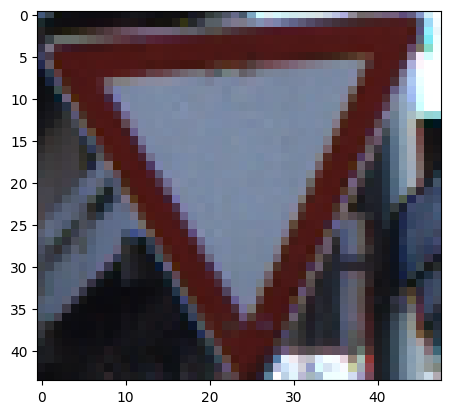

In [4]:
plt.imshow(np.reshape(X_train[4], (44, 48, 3)))

In [5]:
from tensorflow.keras.layers import Input, Reshape, Conv2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
drop_rate = 0.5

input = Input(shape=(6336,))
x = Reshape(target_shape=(44, 48, 3))(input)

x = Conv2D(32, kernel_size=3, activation="relu", kernel_initializer="he_normal")(x)
x = BatchNormalization()(x)

x = Conv2D(32, kernel_size=3, activation="relu", kernel_initializer="he_normal")(x)
x = BatchNormalization()(x)

x = Conv2D(32, kernel_size=5, activation="relu", kernel_initializer="he_normal", strides=2, padding="same")(x)
x = BatchNormalization()(x)

x = Dropout(drop_rate)(x)

x = Conv2D(64, kernel_size=3, activation="relu", kernel_initializer="he_normal")(x)
x = BatchNormalization()(x)

x = Conv2D(64, kernel_size=3, activation="relu", kernel_initializer="he_normal")(x)
x = BatchNormalization()(x)

x = Conv2D(64, kernel_size=5, activation="relu", kernel_initializer="he_normal", strides=2, padding="same")(x)
x = BatchNormalization()(x)

x = Dropout(drop_rate)(x)

x = Conv2D(128, kernel_size=4, activation="relu", kernel_initializer="he_normal")(x)
x = BatchNormalization()(x)

x = Dropout(drop_rate)(x)

x = Flatten()(x)
x = Dense(1000, activation="relu")(x)
x = Dropout(drop_rate)(x)
y = Dense(Y_train.shape[1], activation="softmax")(x)

model = Model(input, y)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6336)]            0         
                                                                 
 reshape (Reshape)           (None, 44, 48, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 42, 46, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 42, 46, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 44, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 40, 44, 32)       128       
 hNormalization)                                             

In [8]:
stop = EarlyStopping(monitor="val_acc", min_delta=0, patience=50, restore_best_weights=True)

for b, p in [(32, 0.001), (16, 0.0001)]:
    model.compile(Adam(p), "categorical_crossentropy", metrics=["acc"])
    model.fit(X_train, Y_train, batch_size=b, epochs=50, validation_data=(X_test, Y_test), callbacks=[stop])
    print(f"Val acc: {model.evaluate(X_test, Y_test)[1]:.04f}")

Epoch 1/50
50/50 [==============================] - 20s 295ms/step - loss: 4.5476 - acc: 0.1725 - val_loss: 3.9834 - val_acc: 0.0575
Epoch 2/50
50/50 [==============================] - 15s 297ms/step - loss: 2.4748 - acc: 0.4425 - val_loss: 2.0077 - val_acc: 0.4600
Epoch 3/50
50/50 [==============================] - 15s 296ms/step - loss: 1.4815 - acc: 0.6444 - val_loss: 1.1121 - val_acc: 0.6475
Epoch 4/50
50/50 [==============================] - 15s 302ms/step - loss: 0.8872 - acc: 0.7694 - val_loss: 1.1391 - val_acc: 0.7425
Epoch 5/50
50/50 [==============================] - 15s 292ms/step - loss: 0.5987 - acc: 0.8319 - val_loss: 0.7845 - val_acc: 0.8025
Epoch 6/50
50/50 [==============================] - 13s 262ms/step - loss: 0.4671 - acc: 0.8631 - val_loss: 0.8508 - val_acc: 0.8025
Epoch 7/50
50/50 [==============================] - 15s 290ms/step - loss: 0.4340 - acc: 0.8731 - val_loss: 0.6174 - val_acc: 0.8700
Epoch 8/50
50/50 [==============================] - 13s 269ms/step - 

In [10]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 45ms/step - loss: 0.6256 - acc: 0.9725


[0.6256440877914429, 0.9725000262260437]